# Integrated Project 2

The goal of this project is to train a model to predict the recovery of gold in a gold purification process. The model will be based on Symmetric Mean Absolute Percentage Error (sMAPE) and we will need to clean the data, and explore which regression technique will evaluate at a higher standard.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict

In [2]:
try:
    train = pd.read_csv('gold_recovery_train.csv')
    test = pd.read_csv('gold_recovery_test.csv')
    raw_data = pd.read_csv('gold_recovery_full.csv')
except:
    train = pd.read_csv('/datasets/gold_recovery_train.csv')
    test = pd.read_csv('/datasets/gold_recovery_test.csv')
    raw_data = pd.read_csv('/datasets/gold_recovery_full.csv')

## Preparing the Data

### Data Inspection

In [3]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
raw_data.info()
raw_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


There seems to be a significant amount of nulls in each dataset. Luckily, it seems as if no observations are lost between the source data and the split data. All are accounted for.

### Recovery Verification

Let's make sure our recovery equation is accurate with the following equation given.

\begin{equation}
Recovery = \frac{C\times(F-T)}{F\times(C-T)} \times 100\%
\end{equation}

Where:  
C = The share of the gold at the output of the stage  
F = The share of the gold at the input of the stage  
T = The share of the gold at the tail of the stage

In [6]:
def recovery(gold_concentrate, gold_in_feed, gold_in_rougher):
    num = gold_concentrate * (gold_in_feed-gold_in_rougher)
    denom = gold_in_feed * (gold_concentrate-gold_in_rougher)
    if denom != 0:
        return (num / denom) * 100
    else:
        return 0

In [7]:
recovery_check = []
recovery_true = []
for index, row in raw_data.iterrows():
    au_concentrate = row['rougher.output.concentrate_au']
    au_in_feed = row['rougher.input.feed_au']
    au_in_tail = row['rougher.output.tail_au']
    recovery_true_value = row['rougher.output.recovery']
    if au_concentrate > 0 and au_in_feed > 0 and au_in_tail > 0 and recovery_true_value > 0:
        if pd.notnull(au_concentrate) and pd.notnull(au_in_feed) and pd.notnull(au_in_tail) and pd.notnull(recovery_true_value):
            recover = recovery(au_concentrate, au_in_feed, au_in_tail)
            recovery_true.append(row['rougher.output.recovery'])
            recovery_check.append(recover)
test_recovery = pd.Series(recovery_check)
recovery_true = pd.Series(recovery_true)

print(mean_absolute_error(recovery_true, test_recovery))

1.0030660674204479e-14


Our error is so small, we can confirm that it is being properly calculated from the dataset. An error on the order of 10<sup>-14</sup> is coming from calculations with finite storage size and rounding.

### Dataset Differences

Our test set only has 53 columns available, while the training and full dataset have 87. Let's find out which ones are missing.

In [8]:
missing = []
for each in train.columns:
    if each not in test.columns:
        missing.append(each)
missing

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

It appears that all missing columns are either _output_ columns or are _calculation_ columns. This makes sense, as we would typically be trying to use features only, and would need to avoid dependent values that are affected by other features. If they were included, it may weigh some characteristics more than others.

### Data Preprocessing

Because both the training and testing datasets are in the source data set, we will keep their respective identifiers, their dates, and just clean the full source dataset. This is so we do not have issues with random biasing from two separate datasets.

In [9]:
for df in [train, test, raw_data]:
    df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d %H:%M:%S")

In [10]:
train_dates = train['date']
test_dates = test['date']

later we can use these to extract clean observations from the source sheet when we are done data processing and are about to train our models.

In [11]:
def get_cleaned_set(date_series):
    clean = raw_data_clean[raw_data_clean.date.isin(date_series)]
    print(clean.shape)

    features = clean[test.drop('date', axis=1).columns]
    print(features.shape)
    targets = clean[['rougher.output.recovery', 'final.output.recovery']]
    print(targets.shape)
    
    return features, targets

In [12]:
raw_data_clean = raw_data

Now we can start cleaning the data. For starters, there are incomplete portions of the data, as if they were not being recorded. Because the observations are in order by time, they should be acting as continuous numbers, however there are sections where there are, for example, 8 observations all with 0 final concentrations. Because of the nature of this project, there are still residues, so zeros are failures in the recording. We will want to update them, so let's first turn them into nulls.

In [13]:
for col in raw_data_clean.drop('date', axis=1).columns:
    raw_data_clean[col] = raw_data_clean[col].replace({0:np.nan})

Because The recordings are continuous, and we know that observations are in order, we can use a rolling average to look at only similarly timed values to predict what those missing values could be. If a certain scale is not enough, we need to grow the window to make sure all nulls are taken care of.

def rolling_by_day(df, columns):
    for col in columns:
        df[col] = df[col].fillna(df[col].rolling(24, min_periods=1, center=True).mean())
    return df

def rolling_by_month(df, columns):
    for col in columns:
        df[col] = df[col].fillna(df[col].rolling(24*30, min_periods=1, center=True).mean())
    return df

def rolling_by_year(df, columns):
    for col in columns:
        df[col] = df[col].fillna(df[col].rolling(24*30*12, min_periods=1, center=True).mean())
    return df

def rolling_by_growing_groups(df, columns):
    df = rolling_by_day(df, columns)
    df = rolling_by_month(df, columns)
    df = rolling_by_year(df, columns)
    return df

In [14]:
def fill_previous(df, columns):
    for col in columns:
        df[col] = df[col].fillna(method='ffill')
    return df

We want to apply this to our inputs, as shown in the columns we viewed earlier from the test dataset.

In [15]:
raw_data_clean = fill_previous(raw_data_clean, test.drop('date', axis=1).columns)

There are a significant amount of observations with high level of missing values. First, we know our recovery equation is working correctly. Let's try to use that to our advantage for filling missing characteristics. First, we can't have nulls in out inputs for the recovery equation. Let's fill those.

In [16]:
raw_data_clean = fill_previous(raw_data_clean, ['final.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.tail_au', 'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au'])

There are two recovery equation scenarios, so here are there seperated inputs.

In [17]:
recovery_stages = {'final.output.recovery': ['final.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.tail_au'],
                   'rougher.output.recovery': ['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au']
                  }

We can run the scenario for each case with the following equation.

In [18]:
def manual_recovery(df):
    for key in recovery_stages.keys():
        au_concentrate_col = recovery_stages.get(key)[0]
        au_in_feed_col = recovery_stages.get(key)[1]
        au_in_tail_col = recovery_stages.get(key)[2]

        for index, row in df.iterrows():
            au_concentrate = row[au_concentrate_col]
            au_in_feed = row[au_in_feed_col]
            au_in_tail = row[au_in_tail_col]
            if pd.isnull(row[key]):
                recover = recovery(au_concentrate, au_in_feed, au_in_tail)
                df.loc[index, key] = recover
    return df

In [19]:
raw_data_clean = manual_recovery(raw_data_clean)

In [20]:
raw_data_clean[test.columns].info()
raw_data_clean[['final.output.recovery', 'rougher.output.recovery']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 53 columns):
date                                          22716 non-null datetime64[ns]
primary_cleaner.input.sulfate                 22716 non-null float64
primary_cleaner.input.depressant              22716 non-null float64
primary_cleaner.input.feed_size               22716 non-null float64
primary_cleaner.input.xanthate                22716 non-null float64
primary_cleaner.state.floatbank8_a_air        22716 non-null float64
primary_cleaner.state.floatbank8_a_level      22716 non-null float64
primary_cleaner.state.floatbank8_b_air        22716 non-null float64
primary_cleaner.state.floatbank8_b_level      22716 non-null float64
primary_cleaner.state.floatbank8_c_air        22716 non-null float64
primary_cleaner.state.floatbank8_c_level      22716 non-null float64
primary_cleaner.state.floatbank8_d_air        22716 non-null float64
primary_cleaner.state.floatbank8_d_level      22716 non-

Our inputs and recoverys are all now taken care of and we can proceed to look at the clean data and train the model.

## Analyzing the Data

### Concentrations through the Process

Let's first take a look at how the metals gold, silver, and lead change in concentration over the process.

In [21]:
stage = ['rougher.output', 'primary_cleaner.output', 'final.output']
element = ['concentrate_au', 'concentrate_ag', 'concentrate_pb']
concentration_trends = {}
for i in range(len(element)):
    key = element[i]
    values = []
    for ii in range(len(stage)):
        values.append(raw_data_clean[stage[ii]+'.'+element[i]].mean())
    concentration_trends[key]=values

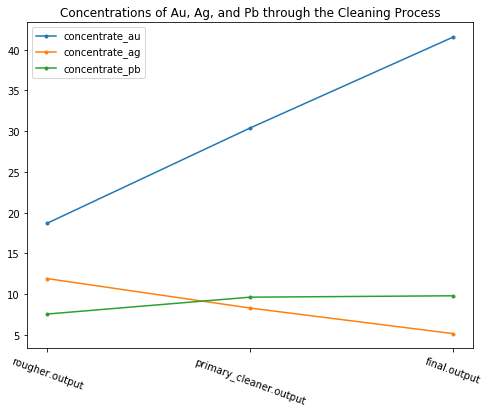

In [22]:
plt.figure(figsize=(8, 6))
for keys, vals in concentration_trends.items():
    plt.plot(range(1, len(vals) + 1), vals, '.-', label=keys)
plt.xticks([1, 2, 3], stage, rotation=-20)
plt.title("Concentrations of Au, Ag, and Pb through the Cleaning Process")
plt.legend()
plt.show()

At the outputs, gold increases in concentration as expected--it is the purpose of the process after all. As for silver, it appears the the process doesn't have a dual purpose, and some silver is lost. Lead seems to not really be affected and is consistently present at each stage.

### Feed Particle Distributions

We are told that our distributions of the Feed Particles cannot be wildly different between the training and the test set. Lets grab the updated set and see if we are in the clear.

In [23]:
train_temp_f, train_temp_t = get_cleaned_set(train.date)
test_temp_f, test_temp_t  = get_cleaned_set(test.date)

(16860, 87)
(16860, 52)
(16860, 2)
(5856, 87)
(5856, 52)
(5856, 2)


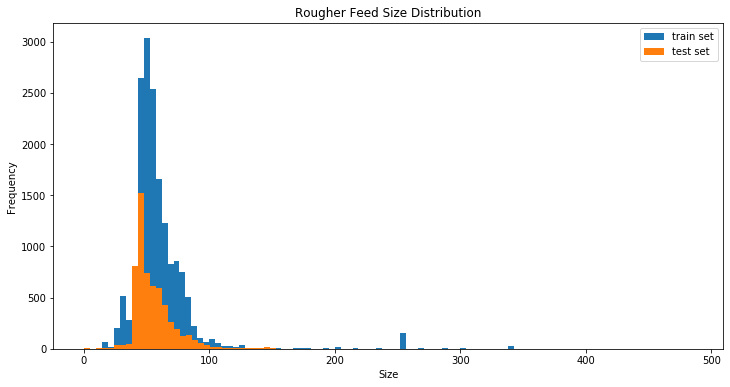

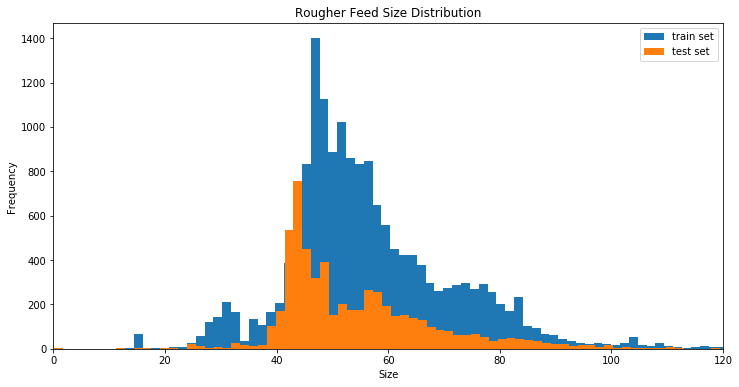

In [24]:
plt.figure(figsize=(12, 6))
train_feed_size = train_temp_f['rougher.input.feed_size']
test_feed_size = test_temp_f['rougher.input.feed_size']
plt.hist(train_feed_size, bins=100)
plt.hist(test_feed_size, bins=100)
plt.title("Rougher Feed Size Distribution")
plt.ylabel('Frequency')
plt.xlabel('Size')
plt.legend(['train set', 'test set'])
plt.show()
plt.figure(figsize=(12, 6))
train_feed_size = train_temp_f['rougher.input.feed_size']
test_feed_size = test_temp_f['rougher.input.feed_size']
plt.hist(train_feed_size, bins=300)
plt.hist(test_feed_size, bins=300)
plt.title("Rougher Feed Size Distribution")
plt.ylabel('Frequency')
plt.xlabel('Size')
plt.xlim([0,120])
plt.legend(['train set', 'test set'])
plt.show()

In [25]:
print('train_feed_size:', train_feed_size.mean())
print('test_feed_size:', test_feed_size.mean())

train_feed_size: 60.18859533601633
test_feed_size: 55.89886568885065


Our feed distributions do not wildly differ from each other, however there are a significant of higher outliers in out. Let's see what we can expect if we removed those tail experiments from the datasets.

In [26]:
print('train_feed_size:', train_feed_size.loc[(train_feed_size<150)].mean())
print('test_feed_size:', test_feed_size.loc[(test_feed_size<150)].mean())

train_feed_size: 56.880437459515306
test_feed_size: 54.888308538694126


Much better. Let's remove those so we can balance our two datasets' distributions.

In [27]:
raw_data_clean = raw_data_clean[raw_data_clean['rougher.input.feed_size'] < 150]

Now we can feel a bit more confident that the training and test set evaluation will be accurate.

### Stage Concentrations

Let's take a look at the distributions of the concentrations to see how each metal typically fairs throughout the process.

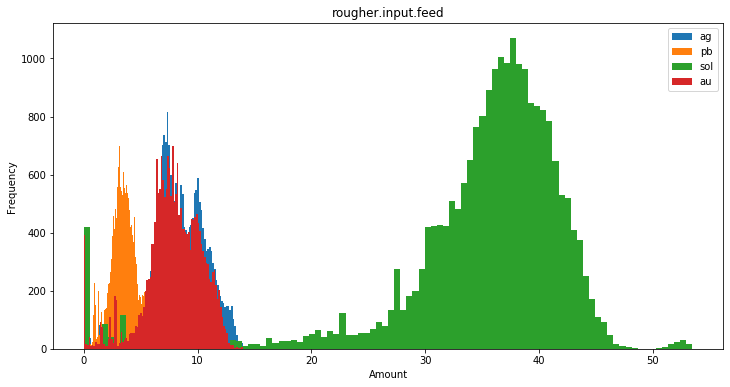

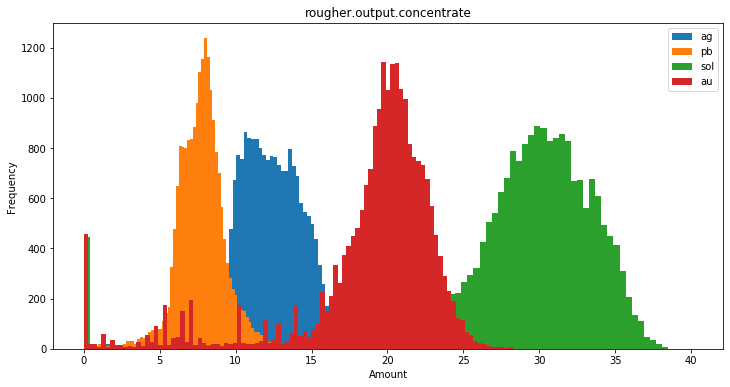

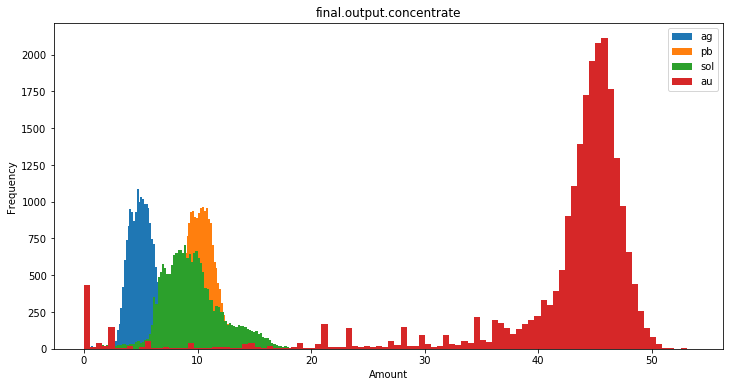

In [28]:
stages = ['rougher.input.feed', 'rougher.output.concentrate', 'final.output.concentrate']
elements = ['ag', 'pb', 'sol', 'au']

for stage in stages:
    plt.figure(figsize=(12, 6))
    for element in elements:
        element_dist = raw_data_clean[stage + '_' + element]
        plt.hist(element_dist, bins=100)
        plt.title(stage)
        plt.ylabel('Frequency')
        plt.xlabel('Amount')
    plt.legend(['ag', 'pb', 'sol', 'au'])
    plt.show()

There seems to be a fair amount of near zero amounts of final gold concentrations. With this being a process that tries to recover gold, these are likely not what we want to train our model with. Let's remove them.

In [29]:
raw_data_clean = raw_data_clean[(raw_data_clean['rougher.output.concentrate_au'] > .1) & (raw_data_clean['final.output.concentrate_au'] > .1)]

Now that the nearly zero value anomalies are removed, let's train our model.

## Building the Model

### sMAPE Function

We believe that the Symmetric Mean Absolute Percentage Error (sMAPE) is going to be our best evaluation metric. In order to measure it, let's build the function.

\begin{equation}
sMAPE = \frac{1}{N}\sum_{i=1}^{N}\frac{|y_i-\hat{y_i}|}{(|y_i| + |\hat{y_i}|)/2}
\end{equation}

In [30]:
def sMAPE(predictions, targets):
    y_i = targets.reset_index(drop=True) # Value of recovery target for the ith observation
    ycar_i = predictions.reset_index(drop=True) # Value of recovery prediction for the ith observation
    n = len(predictions) # Number of observations in the sample.
    
    num = abs(y_i - ycar_i)
    denom = abs(y_i) + abs(ycar_i)/2
    frac = num/denom
    
    return (frac.sum()/n)*100

\begin{equation}
\text{Final sMAPE} = 25\% \times \text{ sMAPE(rougher) } + 75\% \times \text{ sMAPE(final) }
\end{equation}

In [31]:
def final_sMAPE(predictions, targets):
    rougher = .25 * sMAPE(predictions['rougher.output.recovery'], targets['rougher.output.recovery'])
    final =   .75 * sMAPE(predictions['final.output.recovery'], targets['final.output.recovery'])
    
    return rougher + final

### Model Training

#### Train and Test Samples Regrouping

In [32]:
train_features, train_targets = get_cleaned_set(train.date)

(16082, 87)
(16082, 52)
(16082, 2)


In [33]:
test_features, test_targets = get_cleaned_set(test.date)

(5825, 87)
(5825, 52)
(5825, 2)


#### Linear Regression

In [34]:
%%time
lr_model = LinearRegression()
lr_model.fit(train_features, train_targets)

predictions = cross_val_predict(lr_model, train_features, train_targets, cv=3)

df_predictions = pd.DataFrame({'rougher.output.recovery':predictions[:,0], 'final.output.recovery':predictions[:,1]})

number = final_sMAPE(df_predictions, train_targets)

print('{:.4}%'.format(number))

111.9%
CPU times: user 747 ms, sys: 679 ms, total: 1.43 s
Wall time: 1.4 s


105.5% seems pretty good. Linear Regression seems to be a pretty confident choice already. Let's take a look at the Random Forest Regressor to compare.

#### Random Forest Regressor

In [35]:
%%time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
estims = []
sMAPEs = []
for estim in range(10, 50, 10):
    estims.append(estim)
    rf_model = RandomForestRegressor(n_estimators=estim, random_state=12345)
    rf_model.fit(train_features, train_targets)

    predictions = cross_val_predict(rf_model, train_features, train_targets, cv=3)

    df_predictions = pd.DataFrame({'rougher.output.recovery':predictions[:,0], 'final.output.recovery':predictions[:,1]})

    number = final_sMAPE(df_predictions, train_targets)
    sMAPEs.append(number)
    print('number of estimators:', estim)
    print('sMAPE:', '{:.4}%'.format(number))

number of estimators: 10
sMAPE: 26.03%
number of estimators: 20
sMAPE: 26.7%
number of estimators: 30
sMAPE: 27.97%
number of estimators: 40
sMAPE: 27.59%
CPU times: user 10min 49s, sys: 459 ms, total: 10min 49s
Wall time: 18min 42s


Yikes--Pretty poor performance associated with the Random Forest Regressors... However, this can be the case with large datasets with lots of features that the random forest tries to fit, especially with regression rather than classification. Also, the time it took for the forest model to train was significantly longer for worse results. Therefore our Linear Regression is the prefered model type.

#### Model Testing

In [36]:
test_features, test_targets = get_cleaned_set(test.date)

(5825, 87)
(5825, 52)
(5825, 2)


In [37]:
test_predictions = lr_model.predict(test_features)

df_test_predictions = pd.DataFrame({'rougher.output.recovery':test_predictions[:,0], 'final.output.recovery':test_predictions[:,1]})

number = final_sMAPE(df_test_predictions, test_targets)

print('{:.4}%'.format(number))

80.83%


Even better than our training, our testing seems to have proven that the Linear Regression was the way to go.

## Conclusion

We have taken the three datasets and have filled there missing inputs with rolling averages to represent real world observations. We then reviewed the data to check for annomalies. Lastly, we trained and validated a linear regression model and a random forest regressor model. We used an sMAPE metric and found that our best model, the Linear Regression, trained with a 111.9% and tested at 80.83%.

While preproccising data, we noticed a fair amount of nulls and presumed failed records that were zeros. Because the observations were based on time, and this is a process based over time, then the best approximations of values are recent values. We used the most recent non-zero, non-null value To fill in the missing ones. We then used our working recovery equations to fill in those missing values for higher accuracy.

We then viewed the data visually to inspect for anomalies. We found that there were a few feed particle sizes that were skewing the training set's data. we removed these to increase the similarity, so the evaluation metrics would be similar. We also saw that in the final concentrations of gold, there were a few observations that were nearly zero. Contrary to the purpose of the process to begin with, these are likely failed attemps so they were removed.

We then took the training set and trained both a linear regression model and a few Random Forest regressions. Each model was evaluated with cross validation for more confidence. We found not only that the Linear regression was evaluating with at a much better score, but it was also significantly faster. This is typical when datasets contain a lot of characterstics. Decision Tree and Random Forest regressions tend to do poorly determining final predictions when overloaded with so many inputs. The linear regression model had an sMAPE of 111.9% and it was tested with the Testing dataset, resulting in an SMAPE of 80.83%. the sMAPE evaluation can range from 0 to 200 percent, with 100 being the goal. In this case, 80.83 is acceptable.

In this case, we can assume that the model has accurately predicted what recovery we can expect on the gold throughout the process, and therefore could take this information back to later determine with better certainty, what characteristics of the process are crucial to optimizing the gold recovered.